In [1]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import random
from sklearn.utils import shuffle
from sklearn import cluster
import CreateDataFunctions as df
from scipy.spatial import distance
from array import *
import warnings
warnings.filterwarnings('ignore')
from mpl_toolkits.mplot3d import Axes3D

In [2]:
data1, c1 = df.Data_gussian_cluster(nr_data_points = 1000)
data2, c2 = df.Data_separated_clusters()
data3, c3 = df.Gaussian_cluster_grid(grid_size=10, scale=8, nr_data_points=10, sigma=0.6)
data4, c4 = df.ThreeCirclesData()

data5_grid = 4
data5_nr_features = 5
data5, c5 = df.Gaussian_cluster_grid(grid_size=data5_grid, scale=25, nr_data_points=10, nr_features=data5_nr_features, sigma=0.5)
data6, c6 = df.Data_gussian_cluster_hard(nr_data_points = 500)

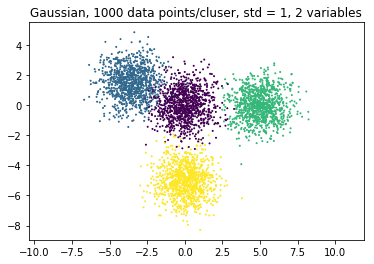

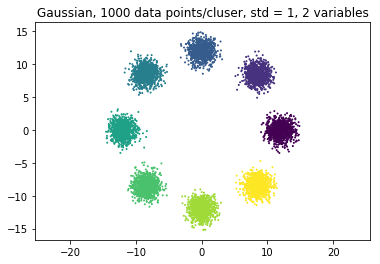

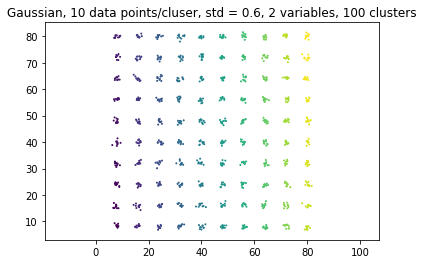

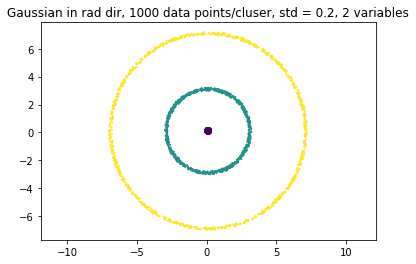

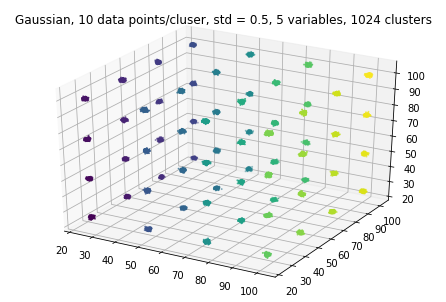

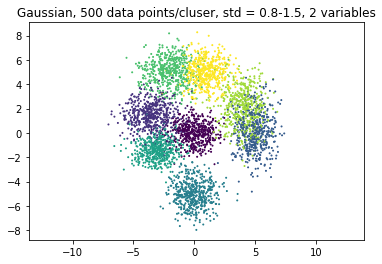

In [3]:
plt.scatter(data1[:,0],data1[:,1],s=1,c=c1)
plt.title('Gaussian, 1000 data points/cluser, std = 1, 2 variables')
plt.axis('equal')
plt.show()
plt.scatter(data2[:,0],data2[:,1],s=1,c=c2)
plt.title('Gaussian, 1000 data points/cluser, std = 1, 2 variables')
plt.axis('equal')
plt.show()
plt.scatter(data3[:,0],data3[:,1],s=1,c=c3)
plt.title('Gaussian, 10 data points/cluser, std = 0.6, 2 variables, 100 clusters')
plt.axis('equal')
plt.show()
plt.scatter(data4[:,0],data4[:,1],s=1,c=c4)
plt.axis('equal')
plt.title('Gaussian in rad dir, 1000 data points/cluser, std = 0.2, 2 variables')
plt.show()

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(data5[:,0], data5[:,1], data5[:,2], c=c5, s=1)
plt.title('Gaussian, 10 data points/cluser, std = 0.5, 5 variables, 1024 clusters')
plt.show()

plt.scatter(data6[:,0],data6[:,1],s=1,c=c6)
plt.axis('equal')
plt.title('Gaussian, 500 data points/cluser, std = 0.8-1.5, 2 variables')
plt.show()

In [9]:
def ComputeBIC_kmeans(kmeans, data):
    nrDataPts = np.shape(data)[0]
    centers = [kmeans.cluster_centers_]
    labels  = kmeans.labels_
    m = kmeans.n_clusters
    n = np.bincount(labels)
    N, d = data.shape
    
    cl_var = (1.0 / (N - m) / d) * sum([sum(distance.cdist(data[np.where(labels == i)],
    [centers[0][i]], 'euclidean')**2) for i in range(m)])
    #cl_var = sum(np.var(data[np.where(labels == i)]) for i in range(m))
    const_term = 0.5 * m * np.log(N) * (d+1)
    
    
    #BIC = [cl_var + i*d*np.log(n) for i in range(m)]
    BIC = (np.sum([n[i] * np.log(n[i]) -
        n[i] * np.log(N) -
            ((n[i] * d) / 2) * np.log(2*np.pi*cl_var) -
           ((n[i] - 1) * d/ 2) for i in range(m)]) - const_term)*(-1)/nrDataPts
    
    return BIC, labels
    
    
# [centers[0][i]]

In [ ]:
#don't care about this one..

def getCentresFromLabels(labels, data, nrClusters):
    means = np.zeros((nrClusters,data.shape[1]))
    for i in range(nrClusters):
        dat = data[labels == i]
        for j in range(dat.shape[1]):
            means[i,j] = np.mean(dat[:,j])
    return means

def ComputeBIC_spec_clus(SpectralClustering, data):
    labels  = SpectralClustering.labels_    
    m = SpectralClustering.n_clusters
    n = np.bincount(labels)
    N, d = data.shape
    centers = getCentresFromLabels(labels, data, m)
    
    cl_var = (1.0 / (N - m) / d) * sum([sum(distance.cdist(data[np.where(labels == i)],
    [centers[i,:]], 'euclidean')**2) for i in range(m)])
    const_term = 0.5 * m * np.log(N) * (d+1)
            
    BIC = (np.sum([n[i] * np.log(n[i]) -
        n[i] * np.log(N) -
            ((n[i] * d) / 2) * np.log(2*np.pi*cl_var) -
           ((n[i] - 1) * d/ 2) for i in range(m)]) - const_term)*(-1)
    
    return BIC, labels

In [10]:
#ks1 = range(1,12)
#ks2 = range(1,12)
#ks3 = range(10,150,10)
#ks4 = range(1,6)
ks5 = range(128,1536,128)
#ks6 = range(1,20,2)



#KMeans1 = [cluster.KMeans(n_clusters = k, init="k-means++").fit(data1) for k in ks1]
#KMeans2 = [cluster.KMeans(n_clusters = k, init="k-means++").fit(data2) for k in ks2]
#KMeans3 = [cluster.KMeans(n_clusters = k, init="k-means++").fit(data3) for k in ks3]
#KMeans4 = [cluster.KMeans(n_clusters = k, init="k-means++").fit(data4) for k in ks4]
KMeans5 = [cluster.KMeans(n_clusters = k, init="k-means++").fit(data5) for k in ks5]
#KMeans6 = [cluster.KMeans(n_clusters = k, init="k-means++").fit(data6) for k in ks6]

#BIC_kmeans1 = [ComputeBIC_kmeans(kmeansi,data1)[0] for kmeansi in KMeans1]
#BIC_kmeans2 = [ComputeBIC_kmeans(kmeansi,data2)[0] for kmeansi in KMeans2]
#BIC_kmeans3 = [ComputeBIC_kmeans(kmeansi,data3)[0] for kmeansi in KMeans3]
#BIC_kmeans4 = [ComputeBIC_kmeans(kmeansi,data4)[0] for kmeansi in KMeans4]
BIC_kmeans5 = [ComputeBIC_kmeans(kmeansi,data5)[0] for kmeansi in KMeans5]
#BIC_kmeans6 = [ComputeBIC_kmeans(kmeansi,data6)[0] for kmeansi in KMeans6]

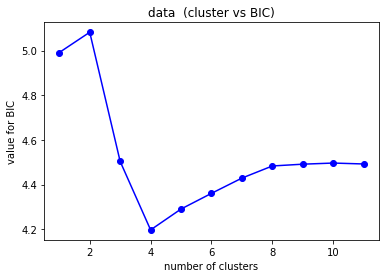

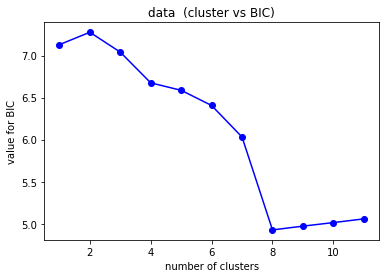

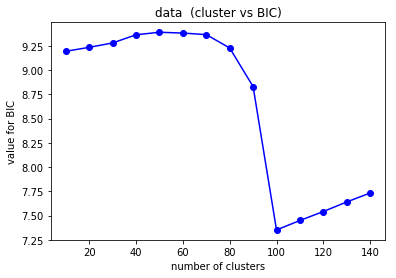

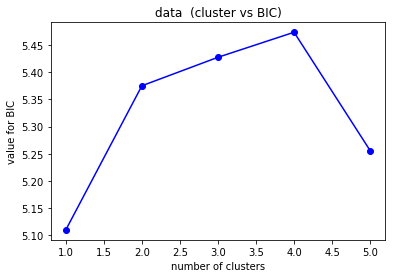

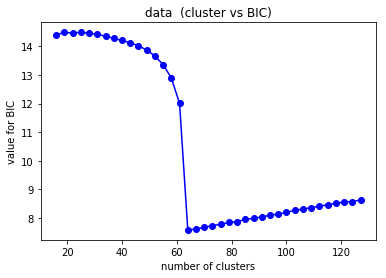

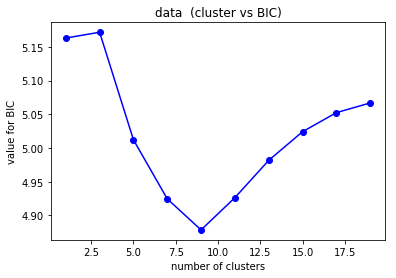

In [14]:
#print(BIC_kmeans1)
plt.plot(ks1,BIC_kmeans1,'b-o')
plt.title("data  (cluster vs BIC)")
plt.xlabel("number of clusters")
plt.ylabel("value for BIC")
plt.show()
#print(BIC_kmeans2)
plt.plot(ks2,BIC_kmeans2,'b-o')
plt.title("data  (cluster vs BIC)")
plt.xlabel("number of clusters")
plt.ylabel("value for BIC")
plt.show()
#print(BIC_kmeans3)
plt.plot(ks3,BIC_kmeans3,'b-o')
plt.title("data  (cluster vs BIC)")
plt.xlabel("number of clusters")
plt.ylabel("value for BIC")
plt.show()
#print(BIC_kmeans4)
plt.plot(ks4,BIC_kmeans4,'b-o')
plt.title("data  (cluster vs BIC)")
plt.xlabel("number of clusters")
plt.ylabel("value for BIC")
plt.show()
#print(BIC_kmeans5)
plt.plot(ks5,BIC_kmeans5,'b-o')
plt.title("data  (cluster vs BIC)")
plt.xlabel("number of clusters")
plt.ylabel("value for BIC")
plt.show()
#print(BIC_kmeans5)
plt.plot(ks6,BIC_kmeans6,'b-o')
plt.title("data  (cluster vs BIC)")
plt.xlabel("number of clusters")
plt.ylabel("value for BIC")
plt.show()



In [ ]:
#don't care about this one..


#print(BIC_SpecClus1)
plt.plot(ks,BIC_SpecClus1,'b-o')
plt.title("data  (cluster vs BIC)")
plt.xlabel("number of clusters")
plt.ylabel("value for BIC")
plt.show()
#print(BIC_SpecClus2)
plt.plot(ks,BIC_SpecClus2,'b-o')
plt.title("data  (cluster vs BIC)")
plt.xlabel("number of clusters")
plt.ylabel("value for BIC")
plt.show()
#print(BIC_SpecClus3)
plt.plot(ks,BIC_SpecClus3,'b-o')
plt.title("data  (cluster vs BIC)")
plt.xlabel("number of clusters")
plt.ylabel("value for BIC")
plt.show()
#print(BIC_SpecClus4)
plt.plot(ks,BIC_SpecClus4,'b-o')
plt.title("data  (cluster vs BIC)")
plt.xlabel("number of clusters")
plt.ylabel("value for BIC")
plt.show()

In [ ]:
ks = range(1,12)
SpecClus1 = [cluster.SpectralClustering(k,eigen_solver='arpack',affinity="nearest_neighbors").fit(data1) for k in ks]
BIC_SpecClus1 = [ComputeBIC_spec_clus(kmeansi,data1) for kmeansi in SpecClus1]
SpecClus2 = [cluster.SpectralClustering(k,eigen_solver='arpack',affinity="nearest_neighbors").fit(data2) for k in ks]
BIC_SpecClus2 = [ComputeBIC_spec_clus(kmeansi,data2) for kmeansi in SpecClus2]
SpecClus3 = [cluster.SpectralClustering(k,eigen_solver='arpack',affinity="nearest_neighbors").fit(data3) for k in ks]
BIC_SpecClus3 = [ComputeBIC_spec_clus(kmeansi,data3) for kmeansi in SpecClus3]
SpecClus4 = [cluster.SpectralClustering(k,eigen_solver='arpack',affinity="nearest_neighbors").fit(data4) for k in ks]
BIC_SpecClus4 = [ComputeBIC_spec_clus(kmeansi,data4) for kmeansi in SpecClus4]

In [ ]:
color = ComputeBIC_kmeans(KMeans1[3],data1)[1]
plt.scatter(data1[:,0],data1[:,1],s=1,c=color)
plt.show()
#plt.scatter(data2[:,0],data2[:,1],s=1,c=c2)
#plt.show()
#plt.scatter(data3[:,0],data3[:,1],s=1,c=c3)
#plt.show()
#plt.scatter(data4[:,0],data4[:,1],s=1,c=c4)
#plt.show()

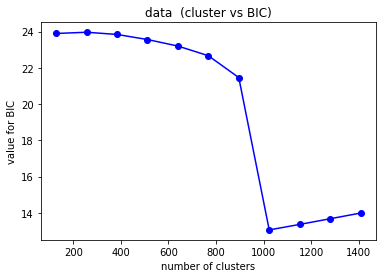

In [11]:
#print(BIC_kmeans5)
plt.plot(ks5,BIC_kmeans5,'b-o')
plt.title("data  (cluster vs BIC)")
plt.xlabel("number of clusters")
plt.ylabel("value for BIC")
plt.show()
    